In [171]:
# COMPUTACIÓN BLANDA - Sistemas y Computación

# -----------------------------------------------------------------
# AJUSTES POLINOMIALES
# -----------------------------------------------------------------
# Lección 07
#
#   ** Se importan los archivos de trabajo
#   ** Se crean las variables
#   ** Se generan los modelos
#   ** Se grafican las funciones
#
# -----------------------------------------------------------------

# Se importa la librería del Sistema Operativo
# Igualmente, la librería utils y numpy
# -----------------------------------------------------------------
import os

# Directorios: chart y data en el directorio de trabajo
# DATA_DIR es el directorio de los datos
# CHART_DIR es el directorio de los gráficos generados
# -----------------------------------------------------------------
from utils import DATA_DIR, CHART_DIR
import numpy as np

# Se eliminan las advertencias por el uso de funciones que
# en el futuro cambiarán
# -----------------------------------------------------------------
np.seterr(all='ignore')

# Se importa la librería scipy y matplotlib
# -----------------------------------------------------------------
import scipy as sp
import matplotlib.pyplot as plt

# Datos de trabajo
# -----------------------------------------------------------------
data = np.genfromtxt(os.path.join(DATA_DIR, "web_traffic.tsv"), 
                     delimiter="\t")

# Se establece el tipo de dato
data = np.array(data, dtype=np.float64)
print(data[:10])
print(data.shape)

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]
(743, 2)


In [172]:
# Se definen los colores
# g = green, k = black, b = blue, m = magenta, r = red
# g = verde, k = negro, b = azul, m = magenta, r = rojo
colors = ['g', 'k', 'b', 'm', 'r']

# Se definen los tipos de líneas
# los cuales serán utilizados en las gráficas
linestyles = ['-', '-.', '--', ':', '-']

# Se crea el vector x, correspondiente a la primera columna de data
# Se crea el vercot y, correspondiente a la segunda columna de data
x = data[:, 0]
y = data[:, 1]

# la función isnan(vector) devuelve un vector en el cual los TRUE
# son valores de tipo nan, y los valores FALSE son valores diferentes
# a nan. Con esta información, este vector permite realizar 
# transformaciones a otros vectores (o al mismo vector), y realizar
# operaciones como sumar el número de posiciones TRUE, con lo
# cual se calcula el total de valores tipo nan
print("Número de entradas incorrectas:", np.sum(np.isnan(y)))

# Se eliminan los datos incorrectos
# -----------------------------------------------------------------

# Los valores nan en el vector y deben eliminarse
# Para ello se crea un vector TRUE y FALSE basado en isnan
# Al negar dichos valores (~), los valores que son FALSE se vuelven
# TRUE, y se corresponden con aquellos valores que NO son nan
# Si el vector x, que contiene los valores en el eje x, se afectan
# a partir de dicho valores lógicos, se genera un nuevo vector en
# el que solos se toman aquellos que son TRUE. Por tanto, se crea
# un nuevo vector x, en el cual han desaparecido los correspondientes
# valores de y que son nan

# Esto mismo se aplica, pero sobre el vector y, lo cual hace que tanto
# x como y queden completamente sincronizados: sin valores nan
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

Número de entradas incorrectas: 8


In [173]:
# CON ESTA FUNCIÓN SE DEFINE UN MODELO, EL CUAL CONTIENE 
# el comportamiento de un ajuste con base en un grado polinomial
# elegido
# -----------------------------------------------------------------
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' dibujar datos de entrada '''

    # Crea una nueva figura, o activa una existente.
    # num = identificador, figsize: anchura, altura
    plt.figure(num=None, figsize=(8, 6))
    
    # Borra el espacio de la figura
    plt.clf()
    
    # Un gráfico de dispersión de y frente a x con diferentes tamaños 
    # y colores de marcador (tamaño = 10)
    plt.scatter(x, y, s=10)
    
    # Títulos de la figura
    # Título superior
    plt.title("Tráfico Web en el último mes")
    
    # Título en la base
    plt.xlabel("Tiempo")
    
    # Título lateral
    plt.ylabel("Solicitudes/Hora")
    
    # Obtiene o establece las ubicaciones de las marcas 
    # actuales y las etiquetas del eje x.
    
    # Los primeros corchetes ([]) se refieren a las marcas en x
    # Los siguientes corchetes ([]) se refieren a las etiquetas
    
    # En el primer corchete se tiene: 1*7*24 + 2*7*24 + ..., hasta
    # completar el total de puntos en el eje horizontal, según
    # el tamaño del vector x
    
    # Además, se aprovecha para calcular los valores de w, los
    # cuales se agrupan en paquetes de w*7*24. Esto permite
    # determinar los valores de w desde 1 hasta 5, indicando
    # con ello que se tiene un poco más de 4 semanas
    
    # Estos valores se utilizan en el segundo corchete para
    # escribir las etiquetas basadas en estos valores de w
    
    # Por tanto, se escriben etiquetas para w desde 1 hasta
    # 4, lo cual constituye las semanas analizadas
    plt.xticks(
        [w * 7 * 24 for w in range(10)], 
        ['semana %i' % w for w in range(10)])

    # Aquí se evalúa el tipo de modelo recibido
    # Si no se envía ninguno, no se dibuja ninguna curva de ajuste
    if models:
        
        # Si no se define ningún valor para mx (revisar el 
        # código más adelante), el valor de mx será
        # calculado con la función linspace

        # NOTA: linspace devuelve números espaciados uniformemente 
        # durante un intervalo especificado. En este caso, sobre
        # el conjunto de valores x establecido
        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        
        # La función zip () toma elementos iterables 
        # (puede ser cero o más), los agrega en una tupla y los devuelve

# HASTA AQUÍ ESTÁ RESUELTO

# --------------------------------------------------------------------

# AQUÍ INICIA LA TAREA DE DOCUMENTACIÓN

# --------------------------------------------------------------------
        
        # Aquí se realiza un ciclo .....
        
        for model, style, color in zip(models, linestyles, colors):
            # print "Modelo:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax)
        print("VALOR DE YMAX !!!!: ", ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

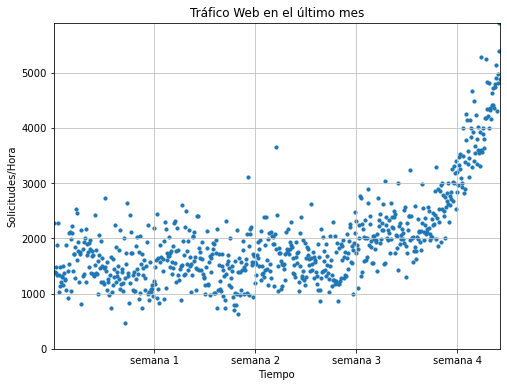

In [174]:
# Primera mirada a los datos
# -----------------------------------------------------------------
plot_models(x, y, None, os.path.join(CHART_DIR, "1400_01_01.png"))

In [175]:
# Crea y dibuja los modelos de datos
# -----------------------------------------------------------------
fp1, res1, rank1, sv1, rcond1 = np.polyfit(x, y, 1, full=True)
print("Parámetros del modelo fp1: %s" % fp1)
print("Error del modelo fp1:", res1)
f1 = sp.poly1d(fp1)

fp2, res2, rank2, sv2, rcond2 = np.polyfit(x, y, 2, full=True)
print("Parámetros del modelo fp2: %s" % fp2)
print("Error del modelo fp2:", res2)
f2 = sp.poly1d(fp2)

f3 = sp.poly1d(np.polyfit(x, y, 3))
f10 = sp.poly1d(np.polyfit(x, y, 10))
f100 = sp.poly1d(np.polyfit(x, y, 100))

Parámetros del modelo fp1: [  2.59619213 989.02487106]
Error del modelo fp1: [3.17389767e+08]
Parámetros del modelo fp2: [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
Error del modelo fp2: [1.79983508e+08]


C:\Users\Usuario UTP\anaconda30\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


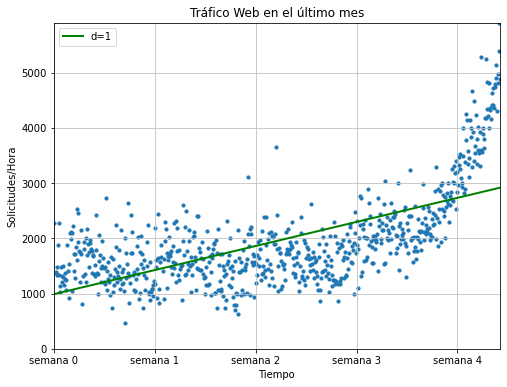

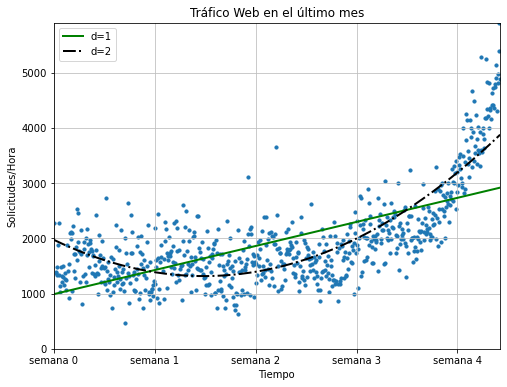

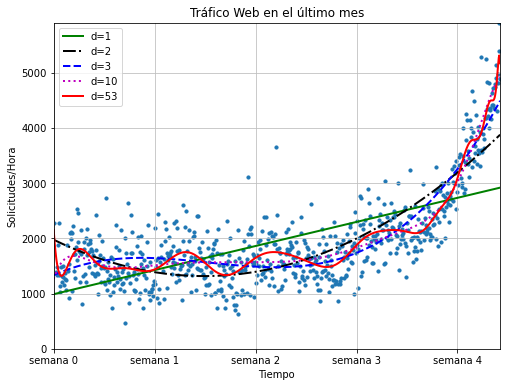

In [176]:
# Se grafican los modelos
# -----------------------------------------------------------------
plot_models(x, y, [f1], os.path.join(CHART_DIR, "1400_01_02.png"))
plot_models(x, y, [f1, f2], os.path.join(CHART_DIR, "1400_01_03.png"))
plot_models(
    x, y, [f1, f2, f3, f10, f100], os.path.join(CHART_DIR, 
                                                "1400_01_04.png"))



xb =  [597. 598. 599. 600. 601. 602. 603. 604. 605. 606. 607. 608. 609. 610.
 611. 612. 613. 614. 615. 616. 617. 618. 619. 620. 621. 622. 623. 624.
 625. 626. 627. 628. 629. 630. 631. 632. 633. 634. 635. 636. 637. 638.
 639. 640. 641. 642. 643. 644. 645. 646. 647. 648. 649. 650. 651. 652.
 653. 654. 655. 656. 657. 658. 659. 660. 661. 662. 663. 664. 665. 666.
 667. 668. 669. 670. 671. 672. 673. 674. 675. 676. 677. 678. 679. 680.
 681. 682. 683. 684. 685. 686. 687. 688. 689. 690. 691. 692. 693. 694.
 695. 696. 697. 698. 699. 700. 701. 702. 703. 704. 705. 706. 707. 708.
 709. 710. 711. 712. 713. 714. 715. 716. 717. 718. 719. 720. 721. 722.
 723. 724. 725. 726. 727. 728. 729. 730. 731. 732. 733. 734. 735. 736.
 737. 738. 739. 740. 741. 742. 743.] 




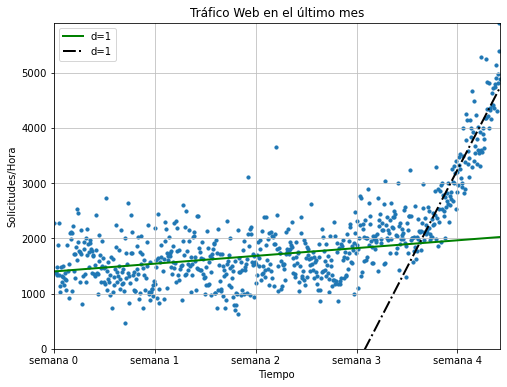

In [177]:
# Ajusta y dibuja un modelo utilizando el conocimiento del punto
# de inflexión
# -----------------------------------------------------------------
inflexion = 3.5 * 7 * 24
xa = x[:int(inflexion)]
ya = y[:int(inflexion)]

xb = x[int(inflexion):]
yb = y[int(inflexion):]

print("\n\nxb = ", 
      xb, "\n\n")

# Se grafican dos líneas rectas
# -----------------------------------------------------------------
fa = sp.poly1d(np.polyfit(xa, ya, 1))
fb = sp.poly1d(np.polyfit(xb, yb, 1))

# Se presenta el modelo basado en el punto de inflexión
# -----------------------------------------------------------------
plot_models(x, y, [fa, fb], os.path.join(CHART_DIR, "1400_01_05.png"))

In [178]:
# Función de error
# -----------------------------------------------------------------
def error(f, x, y):
    return np.sum((f(x) - y) ** 2)

# Se imprimen los errores
# -----------------------------------------------------------------
print("Errores para el conjunto completo de datos:")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

print("Errores solamente después del punto de inflexión")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error de inflexión=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))

Errores para el conjunto completo de datos:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363474
Error d=53: 109452384.924682
Errores solamente después del punto de inflexión
Error d=1: 145045835.134473
Error d=2: 61116348.809620
Error d=3: 33214248.905597
Error d=10: 21611594.264209
Error d=53: 18656085.130466
Error de inflexión=132950348.197616


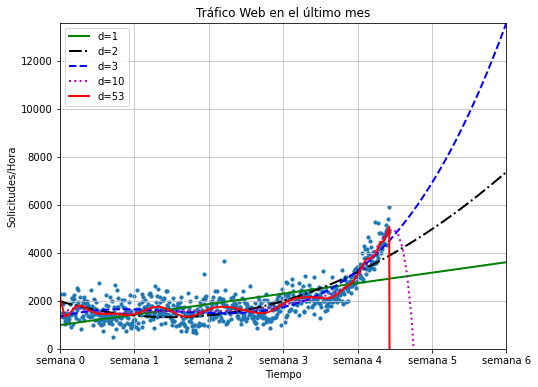

In [179]:
# Se extrapola de modo que se proyecten respuestas en el futuro
# variante ymax = 0
# -----------------------------------------------------------------
plot_models(
    x, y, [f1, f2, f3, f10, f100],
    os.path.join(CHART_DIR, "1400_01_06.png"),
    mx=np.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=0, xmin=0 * 7 * 24)

# ---------------------------------------------------------------

VALOR DE YMAX !!!!:  10000


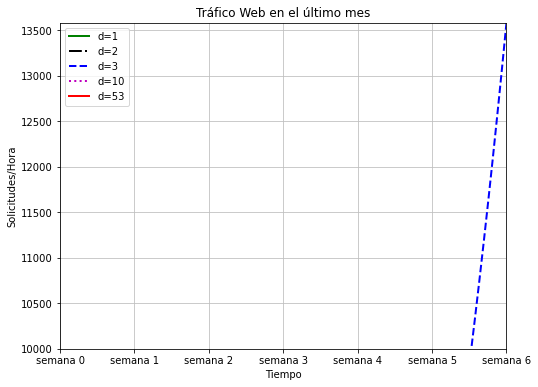

In [180]:
# Se extrapola de modo que se proyecten respuestas en el futuro
# Variante ymax = 10000
# -----------------------------------------------------------------
plot_models(
    x, y, [f1, f2, f3, f10, f100],
    os.path.join(CHART_DIR, "1400_01_06.png"),
    mx=np.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

# ---------------------------------------------------------------

In [181]:
# HASTA AQUÍ ES LA TAREA EN SU FASE DE ENTENDIMIENTO Y GENERACIÓN
# DE COMENTARIOS POR LÍNEA

# La parte que sigue es relativa al entrenamiento del modelo
# y la predicción

print("Entrenamiento de datos únicamente despúes del punto de inflexión")
fb1 = fb
fb2 = sp.poly1d(np.polyfit(xb, yb, 2))
fb3 = sp.poly1d(np.polyfit(xb, yb, 3))
fb10 = sp.poly1d(np.polyfit(xb, yb, 10))
fb100 = sp.poly1d(np.polyfit(xb, yb, 100))

print("Errores después del punto de inflexión")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

Entrenamiento de datos únicamente despúes del punto de inflexión
Errores después del punto de inflexión
Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.733070
Error d=53: 18300664.870091


C:\Users\Usuario UTP\anaconda30\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Usuario UTP\anaconda30\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


VALOR DE YMAX !!!!:  10000


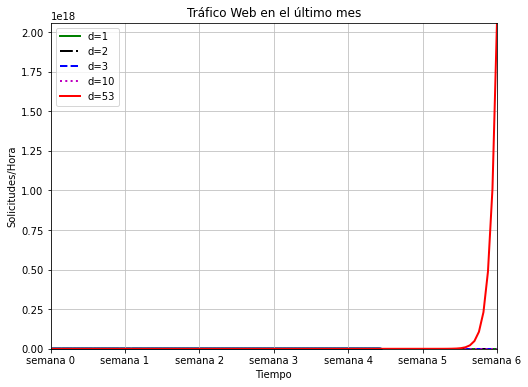

In [182]:
# Gráficas después del punto de inflexión
# -----------------------------------------------------------------
plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100],
    os.path.join(CHART_DIR, "1400_01_07.png"),
    mx=np.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

In [183]:
# =================================================================
# ANÁLISIS DE LA PREDICCIÓN REALIZADA
# =================================================================

# Separa el entrenamiento de los datos de los de prueba
# -----------------------------------------------------------------
# Número de datos de muestreo  para entrenamiento
# -----------------------------------------------------------------
frac = 0.3
split_idx = int(frac * len(xb))

print("\n\nxb = ", xb, "\n\n")
print("\n\nlen(xb) = ", len(xb), "\n\n")
print("\n\nsplit_idx = ", split_idx, "\n\n")



xb =  [597. 598. 599. 600. 601. 602. 603. 604. 605. 606. 607. 608. 609. 610.
 611. 612. 613. 614. 615. 616. 617. 618. 619. 620. 621. 622. 623. 624.
 625. 626. 627. 628. 629. 630. 631. 632. 633. 634. 635. 636. 637. 638.
 639. 640. 641. 642. 643. 644. 645. 646. 647. 648. 649. 650. 651. 652.
 653. 654. 655. 656. 657. 658. 659. 660. 661. 662. 663. 664. 665. 666.
 667. 668. 669. 670. 671. 672. 673. 674. 675. 676. 677. 678. 679. 680.
 681. 682. 683. 684. 685. 686. 687. 688. 689. 690. 691. 692. 693. 694.
 695. 696. 697. 698. 699. 700. 701. 702. 703. 704. 705. 706. 707. 708.
 709. 710. 711. 712. 713. 714. 715. 716. 717. 718. 719. 720. 721. 722.
 723. 724. 725. 726. 727. 728. 729. 730. 731. 732. 733. 734. 735. 736.
 737. 738. 739. 740. 741. 742. 743.] 




len(xb) =  147 




split_idx =  44 




In [184]:
shuffled = sp.random.permutation(list(range(len(xb))))

print("\n\nrange(len(xb)) = ", range(len(xb)), "\n\n")

print("\n\nlist(range(len(xb))) = ", list(range(len(xb))), "\n\n")

print("\n\nshuffled = sp.random.permutation(list(range(len(xb)))) = ", 
      sp.random.permutation( list( range( len(xb) ) ) ), "\n\n")

print("\n\nshuffled ordenado = sp.random.permutation(list(range(len(xb)))) = ", 
      sorted( sp.random.permutation( list( range( len(xb) ) ) ) ), "\n\n")

print("\n\nshuffled = sp.random.permutation(list(range(len(xb)))) = ", 
      sp.random.permutation( list( range( len(xb) ) ) ), "\n\n")



range(len(xb)) =  range(0, 147) 




list(range(len(xb))) =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146] 




shuffled = sp.random.permutation(list(range(len(xb)))) =  [130  55  64  66  45  44  20   5  32  96 128  77  74  52 140 116  89  81
  79 106 136  71  30  51  26  15 135  78  24 139  18  72  31  29 137  54
 100  84  69 111  49 127  56  97 117 105   3  60  99  70 138  47  76  59
  80  43 113  94 110  21  10 

In [185]:
test = sorted(shuffled[:split_idx])

print("\n\ntest = sorted(shuffled[:split_idx]) = ", 
      sorted(shuffled[:split_idx]), "\n\n")



test = sorted(shuffled[:split_idx]) =  [0, 2, 5, 11, 13, 14, 15, 18, 19, 20, 23, 25, 29, 32, 37, 47, 48, 51, 54, 59, 60, 61, 63, 64, 65, 66, 67, 78, 81, 93, 99, 109, 111, 115, 119, 127, 128, 132, 134, 135, 141, 143, 144, 146] 




In [186]:
# 44 índice de xb aleatorios ordenados
train = sorted(shuffled[split_idx:])

print("\n\ntrain = sorted(shuffled[split_idx:]) : ", train, "\n\n")

print("\n\nxb[train] = ", xb[train], "\n\n")



train = sorted(shuffled[split_idx:]) :  [1, 3, 4, 6, 7, 8, 9, 10, 12, 16, 17, 21, 22, 24, 26, 27, 28, 30, 31, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 49, 50, 52, 53, 55, 56, 57, 58, 62, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 112, 113, 114, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 129, 130, 131, 133, 136, 137, 138, 139, 140, 142, 145] 




xb[train] =  [598. 600. 601. 603. 604. 605. 606. 607. 609. 613. 614. 618. 619. 621.
 623. 624. 625. 627. 628. 630. 631. 632. 633. 635. 636. 637. 638. 639.
 640. 641. 642. 643. 646. 647. 649. 650. 652. 653. 654. 655. 659. 665.
 666. 667. 668. 669. 670. 671. 672. 673. 674. 676. 677. 679. 680. 681.
 682. 683. 684. 685. 686. 687. 688. 689. 691. 692. 693. 694. 695. 697.
 698. 699. 700. 701. 702. 703. 704. 705. 707. 709. 710. 711. 713. 714.
 715. 717. 718. 719. 720. 721. 722. 723. 726. 727. 728. 730. 733. 734.
 73

In [187]:
# La función fbt2(x) - 100,000 permite encontrar las raices para la cual
# cumple la predicción
# ----------------------------------------------------------------------
fbt1 = sp.poly1d(np.polyfit(xb[train], yb[train], 1))

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
fbt2 = sp.poly1d(np.polyfit(xb[train], yb[train], 2))
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))

fbt2(x)= 
        2
0.0834 x - 90.93 x + 2.655e+04
fbt2(x)-100,000= 
        2
0.0834 x - 90.93 x - 7.345e+04


In [188]:
fbt3 = sp.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(np.polyfit(xb[train], yb[train], 100))

print("Prueba de error para después del punto de inflexión")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

Prueba de error para después del punto de inflexión
Error d=1: 7039036.221732
Error d=2: 6343253.042161
Error d=3: 6643374.012152
Error d=10: 8680856.850629
Error d=53: 9950562.334625


C:\Users\Usuario UTP\anaconda30\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Usuario UTP\anaconda30\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


VALOR DE YMAX !!!!:  10000


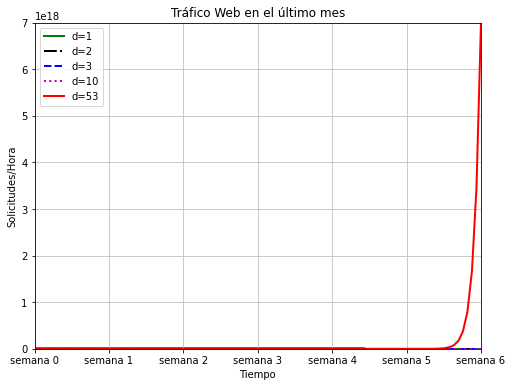

In [189]:
plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],
    os.path.join(CHART_DIR, "1400_01_08.png"),
    mx=np.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

In [190]:
# Se resuelve para la función de grado 2
# --------------------------------------------------------------------
from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 100000)
alcanzado_max = fsolve(fbt2 - 100000, x0=800) / (7 * 24)
print("\n100,000 solicitudes/hora esperados en la semana %f" % 
      alcanzado_max[0])

        2
0.0834 x - 90.93 x + 2.655e+04
        2
0.0834 x - 90.93 x - 7.345e+04

100,000 solicitudes/hora esperados en la semana 9.705303
